In [77]:
import json
from tqdm import tqdm
import numpy as np

In [19]:
import pandas as pd

In [20]:
file_name = "mini_json_dataset.json"
file = json.load(open(file_name,'r'))


In [22]:
df = pd.read_json(file_name)

TypeError: string indices must be integers

# 1° 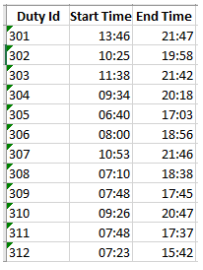

In [23]:
final_text = []
for dutie in tqdm(file["duties"]):
    duty_id = dutie["duty_id"]
    start_times = []
    end_times = []
    
    for event in dutie["duty_events"]:
        start_times += [event.get("start_time")]
        end_times += [event.get("end_time")]

        
    start_times = [i for i in start_times if i is not None]
    end_times = [i for i in end_times if i is not None]
    
    
    for i in range(len(start_times)):
        final_text.append([duty_id,start_times[i],end_times[i]])

final_file = np.array(final_text).astype(str)
np.savetxt("ex1.csv", final_file, delimiter=",",fmt='%s')

100%|██████████████████████████████████████| 144/144 [00:00<00:00, 18077.27it/s]


final_text

# 2° 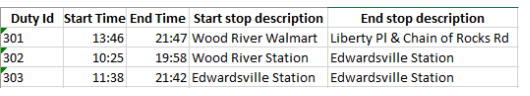

In [90]:
final_text = []
for vehicles in tqdm(file["vehicles"]):
    v_id = vehicles["vehicle_id"]
    start_times = []
    end_times = []
    origin_stop_ids = []
    destination_stop_ids = []
    duty_ids = []
    
    for event in vehicles["vehicle_events"]:
        start_times += [event.get("start_time")]
        end_times += [event.get("end_time")]
        origin_stop_ids += [event.get("origin_stop_id")]
        destination_stop_ids += [event.get("destination_stop_id")]
        duty_ids += [event.get("duty_id")]
    
    duty_ids = np.array(duty_ids)[np.array(start_times) != None]
    start_times = [i for i in start_times if i is not None]
    end_times = [i for i in end_times if i is not None]
    origin_stop_ids = [i for i in origin_stop_ids if i is not None]
    destination_stop_ids = [i for i in destination_stop_ids if i is not None]

    for i in range(len(start_times)):
        final_text.append([duty_ids[i],start_times[i],end_times[i],origin_stop_ids[i],destination_stop_ids[i]])

final_file = np.array(final_text).astype(str)
np.savetxt("ex2.csv", final_file, delimiter=",",fmt='%s')


100%|█████████████████████████████████████████| 97/97 [00:00<00:00, 7857.84it/s]


# 3° 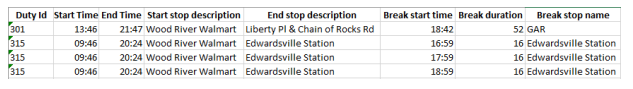

In [118]:
final_text = []
for vehicles in tqdm(file["vehicles"]):
    #pass
    v_id = vehicles["vehicle_id"]
    start_times = []
    end_times = []
    origin_stop_ids = []
    destination_stop_ids = []
    duty_ids = []
    
    for event in vehicles["vehicle_events"]:
        start_times += [event.get("start_time")]
        end_times += [event.get("end_time")]
        origin_stop_ids += [event.get("origin_stop_id")]
        destination_stop_ids += [event.get("destination_stop_id")]
        duty_ids += [event.get("duty_id")]
    
    duty_ids = np.array(duty_ids)[np.array(start_times) != None]
    start_times = [i for i in start_times if i is not None]
    end_times = [i for i in end_times if i is not None]
    origin_stop_ids = [i for i in origin_stop_ids if i is not None]
    destination_stop_ids = [i for i in destination_stop_ids if i is not None]

    for i in range(len(start_times)):
        final_text.append([duty_ids[i],
                           start_times[i],
                           end_times[i],
                           origin_stop_ids[i],
                           start_times[i],
                           str((datetime.strptime(end_times[i].replace(".",":"), '%H:%M:%S') - datetime.strptime(start_times[i].replace(".",":"), '%H:%M:%S'))).split()[-1],
                           destination_stop_ids[i]]
                         )
        
        
final_file = np.array(final_text).astype(str)
np.savetxt("ex3.csv", final_file, delimiter=",",fmt='%s')


100%|█████████████████████████████████████████| 97/97 [00:00<00:00, 1277.59it/s]
